In [4]:
#!pip install scikit-fuzzy

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Criando os antecedentes

In [41]:
# qualidade da comida e serviço vai determinar o valor da gorjeta

quality = ctrl.Antecedent(np.arange(0, 11, 1), "quality") # varia de 0 a 1 do grafico mostrado em aula
service = ctrl.Antecedent(np.arange(0, 11, 1), "service") # varia de 0 a 1 do grafico mostrado em aula

quality.automf(3, names=["Bad", "Decent" , "Great"])  # so pode ser 3,5 ou 7 Categorias no grafico
service.automf(3, names=["Poor", "Acceptable" , "Amazing"])


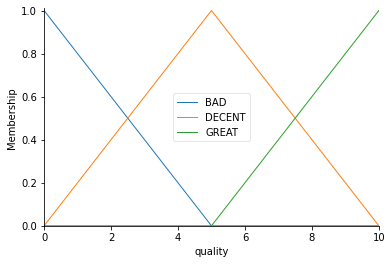

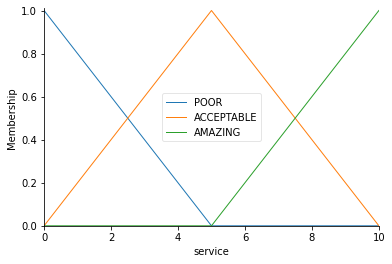

In [32]:
quality.view()
service.view()


#Criando consequente (a saida no caso a gorjeta)

In [37]:
tip = ctrl.Consequent(np.arange(0, 26), "tip") # a consequencia  (gorjeta)

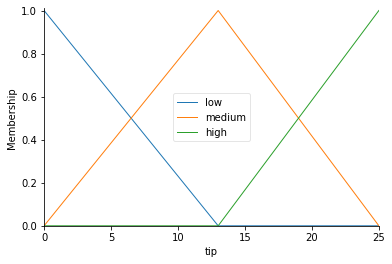

In [38]:
#tip.automf(3) O automf NAO SERVIU NESSE CASO
#Fazendo manualmente:
tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])   # sobe de 0 a 0 e desce de 0 a 13
tip["medium"] = fuzz.trimf(tip.universe, [0, 13, 25]) # sobe de 0 a 13 e desce de 13 a 25
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25]) # sobe de 13 a 25 e desce de 25 a 25

tip.view()

#Criando base de regras

In [42]:
rule1 = ctrl.Rule(service["Poor"] | quality["Bad"], tip["low"])         # se o serviço foi poble e qualidade ruim vou dar gorjeta baixa
rule2 = ctrl.Rule(service["Acceptable"]           , tip["medium"])      # se o serviço foi aceitavel vou dar gorjeta medio
rule3 = ctrl.Rule(service["Amazing"] | quality["Great"], tip["high"])   # se o serviço foi incrivel e qualidade otima vou dar gorjeta alta

#Criando o sistema

In [43]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3]) # as 3 regras criado acima
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

#Testando valores

In [44]:
tipping.input["quality"] = 3.5
tipping.input["service"] = 4.8

tipping.compute()

12.15496380010595


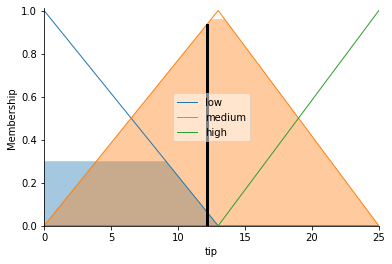

In [45]:
print(tipping.output["tip"])
tip.view(sim=tipping)